------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
1140/1140 [==============================] - 147s 129ms/step - loss: 1.4974 - accuracy: 0.4597
Epoch 2/5
1140/1140 [==============================] - 140s 123ms/step - loss: 1.0890 - accuracy: 0.6159
Epoch 3/5
1140/1140 [==============================] - 142s 125ms/step - loss: 0.9240 - accuracy: 0.6744
Epoch 4/5
1140/1140 [==============================] - 142s 124ms/step - loss: 0.8033 - accuracy: 0.7178
Epoch 5/5
1140/1140 [==============================] - 141s 123ms/step - loss: 0.7071 - accuracy: 0.7528
Score for fold 1: loss of 0.8866739869117737; accuracy of 70.09999752044678%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
1140/1140 [==============================] - 123s 108ms/step - loss: 1.5791 - accuracy: 0.4258
Epoch 2/5
1140/1140 [==============================] - 138s 121ms/step - loss: 1.1898 - accuracy: 0

1140/1140 [==============================] - 155s 136ms/step - loss: 1.1767 - accuracy: 0.5804
Epoch 3/5
1140/1140 [==============================] - 149s 131ms/step - loss: 1.0523 - accuracy: 0.6281
Epoch 4/5
1140/1140 [==============================] - 105s 92ms/step - loss: 0.9655 - accuracy: 0.6598
Epoch 5/5
1140/1140 [==============================] - 172s 151ms/step - loss: 0.8973 - accuracy: 0.6842
Score for fold 14: loss of 0.9482280015945435; accuracy of 67.63333082199097%
------------------------------------------------------------------------
Training for fold 15 ...
Epoch 1/5
1140/1140 [==============================] - 171s 150ms/step - loss: 1.4607 - accuracy: 0.4680
Epoch 2/5
1140/1140 [==============================] - 166s 146ms/step - loss: 1.0748 - accuracy: 0.6205
Epoch 3/5
1140/1140 [==============================] - 170s 150ms/step - loss: 0.9245 - accuracy: 0.6751
Epoch 4/5
1140/1140 [==============================] - 148s 130ms/step - loss: 0.8328 - accuracy: 0.

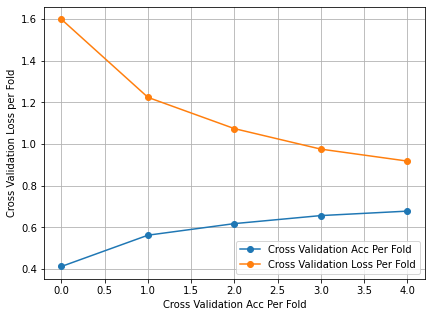

------------------------------------------------------------------------
> Fold 2 - Loss: 1.0082530975341797 - Accuracy: 65.13333320617676%


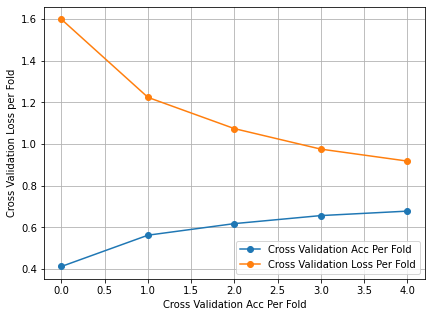

------------------------------------------------------------------------
> Fold 3 - Loss: 0.9472264051437378 - Accuracy: 67.63333082199097%


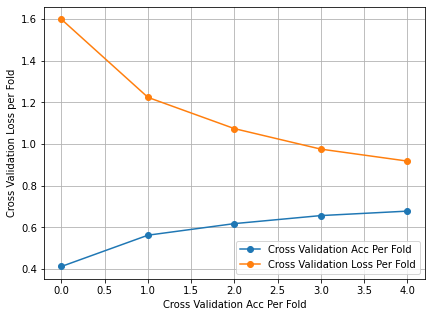

------------------------------------------------------------------------
> Fold 4 - Loss: 0.9649580121040344 - Accuracy: 66.53333306312561%


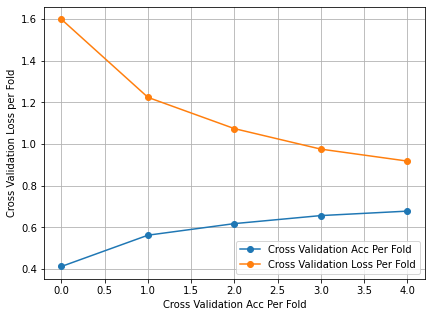

------------------------------------------------------------------------
> Fold 5 - Loss: 0.9846193194389343 - Accuracy: 65.86666703224182%


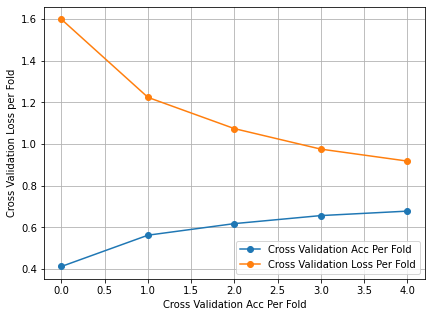

------------------------------------------------------------------------
> Fold 6 - Loss: 0.8257413506507874 - Accuracy: 72.53333330154419%


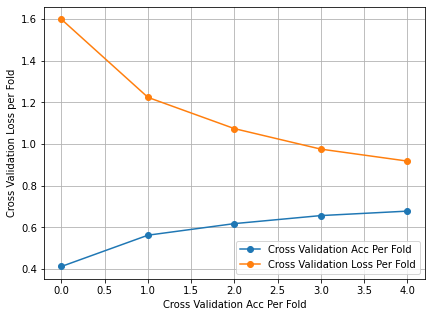

------------------------------------------------------------------------
> Fold 7 - Loss: 0.9427286982536316 - Accuracy: 66.76666736602783%


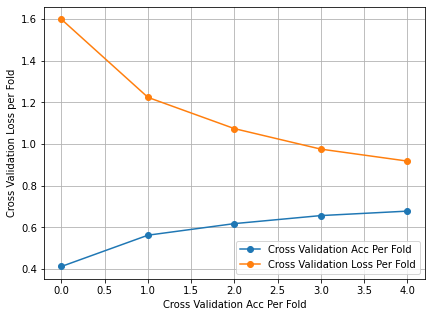

------------------------------------------------------------------------
> Fold 8 - Loss: 0.9497604370117188 - Accuracy: 67.03333258628845%


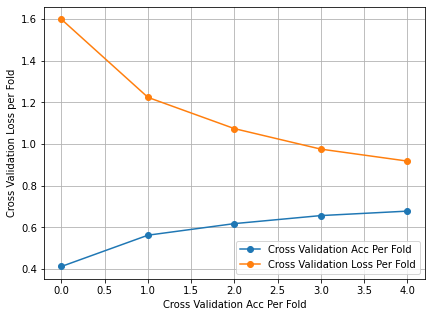

------------------------------------------------------------------------
> Fold 9 - Loss: 0.8829673528671265 - Accuracy: 69.80000138282776%


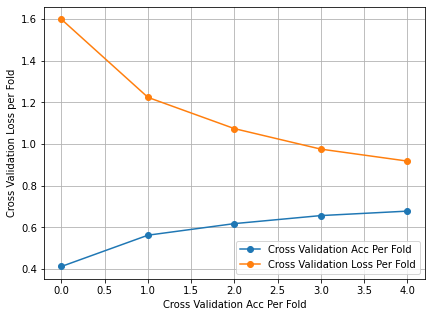

------------------------------------------------------------------------
> Fold 10 - Loss: 0.9250720143318176 - Accuracy: 67.73333549499512%


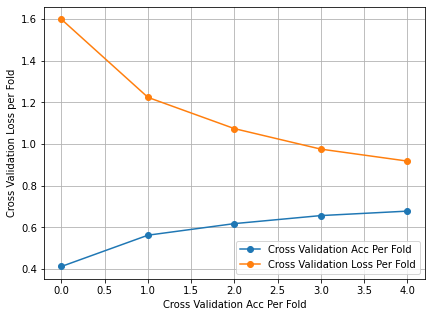

------------------------------------------------------------------------
> Fold 11 - Loss: 0.9053418040275574 - Accuracy: 67.93333292007446%


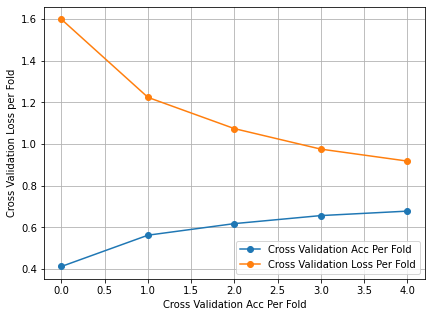

------------------------------------------------------------------------
> Fold 12 - Loss: 0.8769630789756775 - Accuracy: 69.16666626930237%


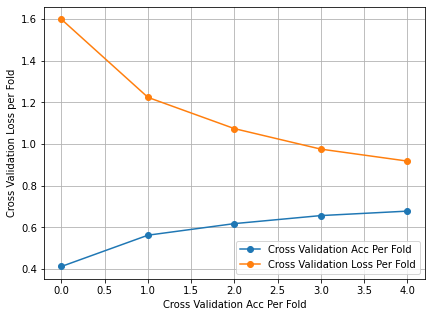

------------------------------------------------------------------------
> Fold 13 - Loss: 0.9270663261413574 - Accuracy: 67.43333339691162%


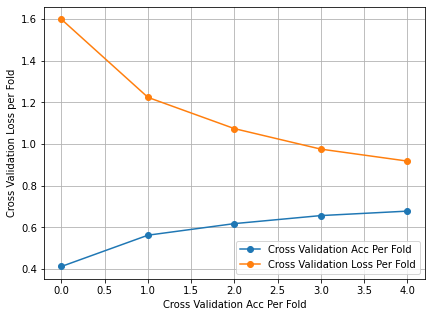

------------------------------------------------------------------------
> Fold 14 - Loss: 0.9482280015945435 - Accuracy: 67.63333082199097%


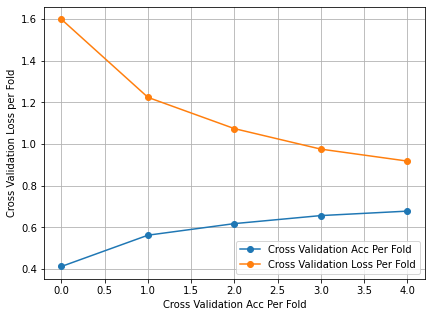

------------------------------------------------------------------------
> Fold 15 - Loss: 0.8469257950782776 - Accuracy: 70.13333439826965%


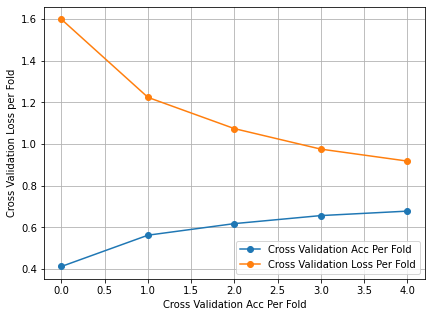

------------------------------------------------------------------------
> Fold 16 - Loss: 0.8820449113845825 - Accuracy: 69.33333277702332%


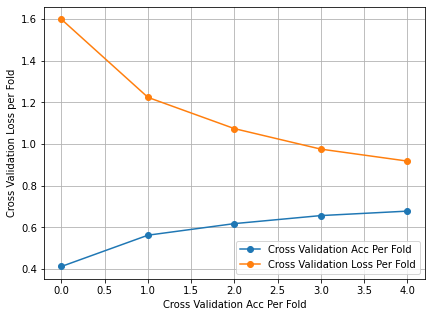

------------------------------------------------------------------------
> Fold 17 - Loss: 0.9800399541854858 - Accuracy: 65.56666493415833%


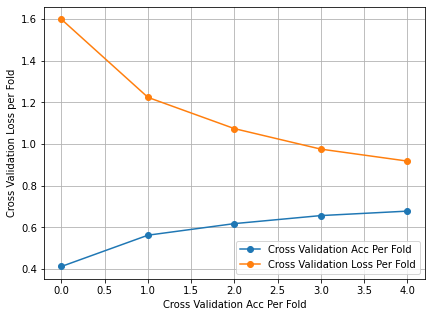

------------------------------------------------------------------------
> Fold 18 - Loss: 0.8283854126930237 - Accuracy: 71.79999947547913%


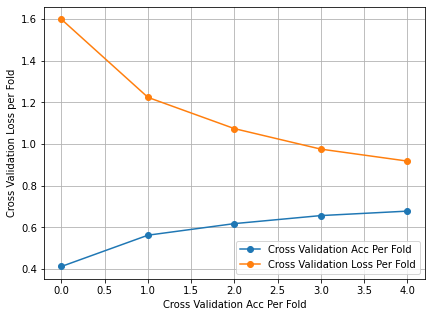

------------------------------------------------------------------------
> Fold 19 - Loss: 1.0089291334152222 - Accuracy: 65.36666750907898%


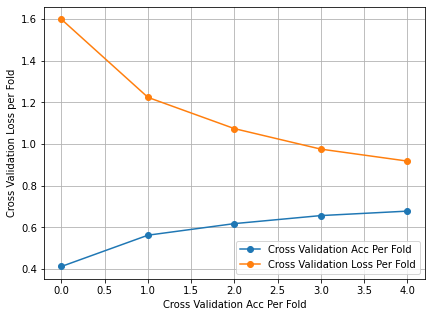

------------------------------------------------------------------------
> Fold 20 - Loss: 0.9785588979721069 - Accuracy: 66.29999876022339%


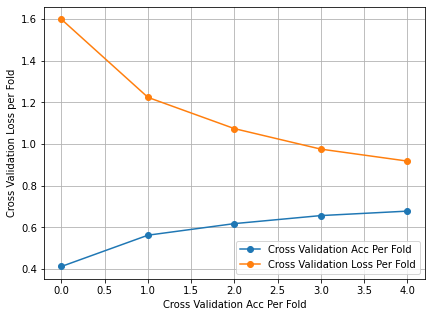

------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 67.98999965190887 (+- 2.0508020439048638)
> Loss: 0.9250241994857789
------------------------------------------------------------------------


In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 5
optimizer = Adam()
verbosity = 1
num_folds = 20

# Load CIFAR-10 data
(input_train, target_train), (input_test, target_test) = cifar10.load_data()

# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Merge inputs and targets
inputs = np.concatenate((input_train, input_test), axis=0)
targets = np.concatenate((target_train, target_test), axis=0)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(no_classes, activation='softmax'))

  # Compile the model
  model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)

  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  plt.plot(history.history['accuracy'], 'o-', label='Cross Validation Acc Per Fold')
  plt.plot(history.history['loss'], 'o-', label = 'Cross Validation Loss Per Fold')
  plt.xlabel('Cross Validation Acc Per Fold')
  plt.ylabel('Cross Validation Loss per Fold')
  plt.grid(True)
  plt.legend(loc='lower right')
  plt.show() 
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')